<a href="https://colab.research.google.com/github/sinapy/Supervised-Learning-Course/blob/main/LabAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [51]:
np.random.seed(98)

In [52]:
MNIST_sina = fetch_openml('mnist_784', version=1)

In [63]:
# 2. List the Keys
dir(MNIST_sina)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [64]:
# 3. Assign the data to a ndarray named X_sina 
X_sina = MNIST_sina.data
# 4. Assign the target to a ndarray named y_sina
y_sina = MNIST_sina.target

In [65]:
# 5. print the types of X_sina and y_sina
print(type(X_sina))
print(type(y_sina))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [66]:
# 6. print the shape of X_sina and y_sina
print(X_sina.shape)
print(y_sina.shape)

(70000, 784)
(70000,)


In [67]:
# 7. create three values that store the values of index 3, 8 and 1
X_sina = pd.DataFrame(X_sina).to_numpy()
y_sina = pd.DataFrame(y_sina).to_numpy()
some_digit12, some_digit13, some_digit14 = X_sina[3], X_sina[8], X_sina[1]

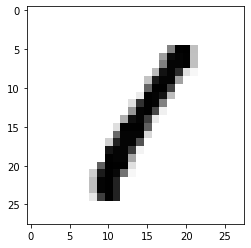

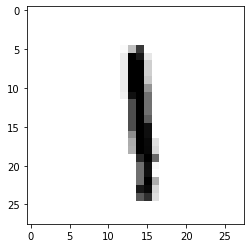

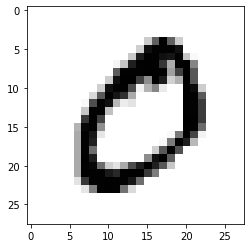

In [68]:
# 8. use imshow to plot the values of the three varialbes
import matplotlib.pyplot as plt
for value in [some_digit12, some_digit13, some_digit14]:
  img = value.reshape(28,28)
  plt.imshow(img, cmap="binary")
  plt.show()

In [69]:
# 9. change the type of y to unit8
y_sina = y_sina.astype(np.uint8)
type(y_sina[0][0])

numpy.uint8

In [79]:
# 10. 
for i in range(70000):
  value = 0
  if (0 <= y_sina[i][0] <= 3):
    value = 0
  elif (4 <= y_sina[i][0] <= 6):
    value = 1
  else:
    value = 9
  
  y_sina[i][0] = value

frequency of zeros = 28911
frequency of Ones = 20013
frequency of Nines = 21076


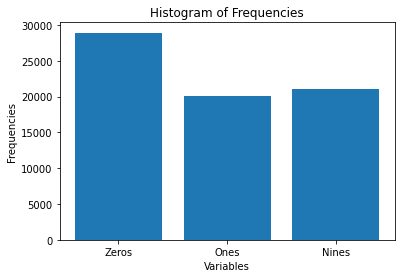

In [95]:
frequency0 = 0
frequency1 = 0
frequency9 = 0
for i in y_sina:
  if i == 0:
    frequency0 += 1
  elif i == 1:
    frequency1 += 1
  else:
    frequency9 += 1

print("frequency of zeros = " + str(frequency0))
print("frequency of Ones = " + str(frequency1))
print("frequency of Nines = " + str(frequency9))

data = [frequency0, frequency1, frequency9]
labels = ['Zeros', 'Ones', 'Nines']

plt.bar(labels, data)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Frequencies')
plt.title('Histogram of Frequencies')

plt.show()

In [112]:
X_train, y_train, X_test, y_test = X_sina[0:50000], y_sina[0:50000], X_sina[50000:], y_sina[50000:]
y_train.reshape(50000, 1)
y_test.reshape(20000, 1)
print("length of X_train = " + str(len(X_train)))
print("length of y_train = " + str(len(y_train)))
print("length of X_test = " + str(len(X_test)))
print("length of y_test = " + str(len(y_test)))

length of X_train = 50000
length of y_train = 50000
length of X_test = 20000
length of y_test = 20000


In [101]:
# bringing naive bayes
from sklearn.naive_bayes import GaussianNB

In [103]:
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [104]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5887


In [106]:
# bringing Logistic regression
from sklearn.linear_model import LogisticRegression

In [110]:
log_reg = LogisticRegression(solver='lbfgs', random_state=98, multi_class='multinomial', max_iter=1200, tol=0.1)

In [111]:
log_reg.fit(X_train,y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1200, multi_class='multinomial', random_state=98,
                   tol=0.1)